In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.drop(['MiscFeature', 'Alley', 'PoolQC', 'Fence','LotFrontage', 'FireplaceQu' ], axis = 1)
df = df.dropna()

In [12]:
X = df[['LotArea', 'PoolArea', 'OverallQual', 'GarageCars', 'YearRemodAdd', 'Fireplaces','GrLivArea','TotalBsmtSF']]
Y = df.SalePrice
X.head()

,LotArea,PoolArea,OverallQual,GarageCars,YearRemodAdd,Fireplaces,GrLivArea,TotalBsmtSF
0,8450,0,7,2,2003,0,1710,856
1,9600,0,6,2,1976,1,1262,1262
2,11250,0,7,2,2002,1,1786,920
3,9550,0,7,3,1970,1,1717,756
4,14260,0,8,3,2000,1,2198,1145


Buraya kadar bazı özellikleri seçtik ve bir veri kümesi oluşturduk. Bu veri kümesini test ve eğitim olarak ikiye ayıralım.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Eğtim gözlem sayısı: {}'.format(X_train.shape[0]))
print('Test gözlem sayısı: {}'.format(X_test.shape[0]))

Eğtim gözlem sayısı: 1070
Test gözlem sayısı: 268


### Model 1

In [14]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     577.1
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:26:35   Log-Likelihood:                -12671.
No. Observations:                1070   AIC:                         2.536e+04
Df Residuals:                    1061   BIC:                         2.540e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.671e+05   1.23e+05     -7.846      0.000   -1.21e+06   -7.25e+05
LotArea          0.6259      0.103      6.097      0.000       0.424       0.827
PoolArea         5.2892     25.135      0.210      0.833     -44.031      54.609
OverallQual   2.079e+04   1262.054     16.475      0.000    1.83e+04    2.33e+04
GarageCars    1.351e+04   2199.401      6.143      0.000    9194.334    1.78e+04
YearRemodAdd   439.0571     63.751      6.887      0.000     313.965     564.149
Fireplaces    8343.1418   1871.184      4.459      0.000    4671.500     1.2e+04
GrLivArea       43.9840      2.740     16.051      0.000      38.607      49.361
TotalBsmtSF     43.4668      3.322     13.086      0.000      36.949      49.984
==============================================================================
Omnibus:                      267.203   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14116.275
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                      20.792   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

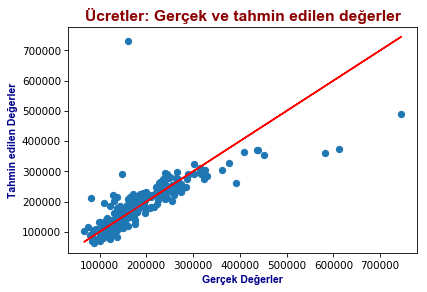

In [31]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [32]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 26788.974571409763
Ortalama Kare Hata (MSE)          : 2768781031.807534
Kök Ortalama Kare Hata (RMSE)     : 52619.207821930715
Ortalama Mutlak Yüzde Hata (MAPE) : 15.363631849009565


### Model 2 (Bazı değişkenler çıkarıldı)

In [33]:
X2 = df[['OverallQual', 'GarageCars', 'YearRemodAdd', 'Fireplaces','GrLivArea','TotalBsmtSF']]

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

print('Eğitim gözlem:', X2_train.shape[0])
print('Test gözlem:', X2_test.shape[0])

Eğitim gözlem: 1070
Test gözlem: 268


In [37]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     738.7
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:46:33   Log-Likelihood:                -12689.
No. Observations:                1070   AIC:                         2.539e+04
Df Residuals:                    1063   BIC:                         2.543e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.325e+05   1.25e+05     -7.451      0.000   -1.18e+06   -6.87e+05
OverallQual   1.981e+04   1272.293     15.568      0.000    1.73e+04    2.23e+04
GarageCars    1.398e+04   2233.358      6.260      0.000    9598.504    1.84e+04
YearRemodAdd   423.3226     64.744      6.538      0.000     296.282     550.363
Fireplaces    1.007e+04   1879.732      5.356      0.000    6379.512    1.38e+04
GrLivArea       46.3960      2.751     16.863      0.000      40.997      51.795
TotalBsmtSF     46.9810      3.324     14.135      0.000      40.459      53.503
==============================================================================
Omnibus:                      261.357   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11497.942
Skew:                           0.224   Prob(JB):                         0.00
Kurtosis:                      19.053   Cond. No.                     3.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

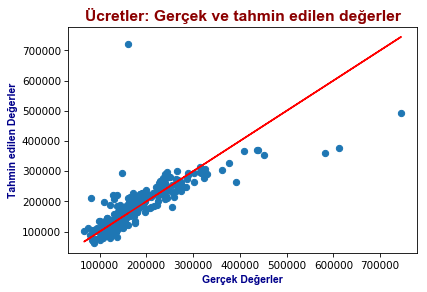

Ortalama Mutlak Hata (MSE)        : 27052.171112037166
Ortalama Kare Hata (MSE)          : 2745966472.2454886
Kök Ortalama Kare Hata (RMSE)     : 52401.97011797828
Ortalama Mutlak Yüzde Hata (MAPE) : 15.504387966689869


In [39]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y2_test, y2_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y2_test, y2_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

* Model 1 ve Model 2'yi karşılaştıralım; Model 1'de istatistiksel olarak anlamlı olmayan bazı değişkenleri çıkarttık. Bu işlem ayarlanmış R squared parametremizi düşürdü.
* Ortalama hata parametreleri açısından önemli bir değişiklik olmadı. 
* Model 2'de tüm özellikler istatistiksel olarak anlamlı. Model 1'de değildi.
* Her iki modelde de gerçek değer arttıkça tahmin gücünün zayıfladığını görüyoruz. 

### Model 3 (Model 2'ye bazı özellikler eklendi)

In [87]:
df['garcarea'] = df.GarageArea * df.GarageCars

X3 = df[['OverallQual', 'YearRemodAdd', 'Fireplaces','GrLivArea','TotalBsmtSF', 
    'MasVnrArea', 'BsmtFinSF1', 'WoodDeckSF', 'garcarea']]
X3.head()

,OverallQual,YearRemodAdd,Fireplaces,GrLivArea,TotalBsmtSF,MasVnrArea,BsmtFinSF1,WoodDeckSF,garcarea
0,7,2003,0,1710,856,196.000,706,0,1096
1,6,1976,1,1262,1262,0.000,978,298,920
2,7,2002,1,1786,920,162.000,486,0,1216
3,7,1970,1,1717,756,0.000,216,0,1926
4,8,2000,1,2198,1145,350.000,655,192,2508


Korelasyon matrisi incelenerek önemli olduğu düşünülen bazı değişkenler eklendi. Ayrıca 'GarageCars' ve 'GarageArea' özellikleri, tek bir etkileşim özelliği olarak eklendi. 

In [84]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.2, random_state = 465)

In [85]:
x3_train = sm.add_constant(x3_train)
results3 = sm.OLS(y3_train, x3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     597.4
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:45:33   Log-Likelihood:                -12603.
No. Observations:                1070   AIC:                         2.523e+04
Df Residuals:                    1060   BIC:                         2.528e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.976e+05   1.16e+05     -7.755      0.000   -1.12e+06    -6.7e+05
OverallQual   1.887e+04   1184.114     15.935      0.000    1.65e+04    2.12e+04
YearRemodAdd   417.4780     59.769      6.985      0.000     300.198     534.758
Fireplaces    8703.0595   1763.488      4.935      0.000    5242.735    1.22e+04
GrLivArea       43.5727      2.605     16.727      0.000      38.461      48.684
TotalBsmtSF     29.2224      3.367      8.678      0.000      22.615      35.830
MasVnrArea      28.9164      5.976      4.839      0.000      17.190      40.643
BsmtFinSF1      21.3970      2.540      8.424      0.000      16.413      26.381
WoodDeckSF      32.5577      7.942      4.099      0.000      16.974      48.141
garcarea        16.4162      1.949      8.425      0.000      12.593      20.240
==============================================================================
Omnibus:                      318.122   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23774.963
Skew:                          -0.376   Prob(JB):                         0.00
Kurtosis:                      26.080   Cond. No.                     3.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

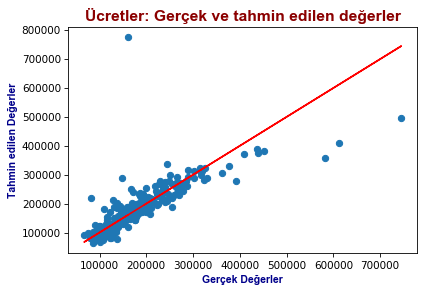

Ortalama Mutlak Hata (MSE)        : 25745.642102895694
Ortalama Kare Hata (MSE)          : 2846008231.9932814
Kök Ortalama Kare Hata (RMSE)     : 53347.99182718391
Ortalama Mutlak Yüzde Hata (MAPE) : 14.72947703565206


In [88]:
x3_test = sm.add_constant(x3_test)

y3_preds = results3.predict(x3_test)

plt.figure(dpi = 75)
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y3_test, y3_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y3_test, y3_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y3_test, y3_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y3_test - y3_preds) / y3_test)) * 100))

* Model 3 ile Model 2 ve Model 1'i karşılaştıralım; Yeni eklediğimiz özellikler ve etkileşimli özelliğimiz istatistiksel olarak anlamlı.
* Ortalama hata parametreleri açısından; Model 1 ve Model 2'ye çok yakın değerler okuyoruz. 
* Model 3 Ayarlanmış R-Squared parametresi en yüksek olan modelimiz. Şimdilik bu 3 modelimizden en iyisi Model 3 diyebiliriz.

### Bu model nasıl daha iyi bir hale getirilebilir? 

Öncelikle bu veri setinde çok ciddi bir keşifsel veri analizi yapmadığımızı belirtelim. Özelliklerimizi seçerken yalnızca istatistiksel rakamlara değil, alan bilgisine ve özellikleri yeterince tanımaya ihtiyaç duyarız. 

* Veriyi ve özellikleri daha iyi anlamak için kapsamlı bir literatür taraması ve alan araştırması yapılabilir
* Aykırı değerler temizlenebilir.
* Özellikler arasında, varsa çoklu doğrusallıklar tespit edilebilir. 
* İlişkili özellikler ile ilgili yeni etkileşim terimleri türetilebilir.
* Her modelin ayrı ayrı hata dağılımları kontrol edilebilir. 